### Procedure: 
First, we will take a look at the train.csv file. We will explore the data and use it to train a model. Then afterwards, we will use the test.csv to test the model we have trained and eventually make a prediction.

Importing all the libraries that we will very likely need:

In [111]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

Now we read in both of our data set into Jupyter Notebook. This is done using the pd.read_csv() function in pandas.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Explorative Data Analysis:

Let us first take a look at the shape/size of the data

In [3]:
print ("The shape/size of the TRAIN data is:", train.shape)
print ("The shape/size of the TEST data is:", test.shape)

The shape/size of the TRAIN data is: (1460, 81)
The shape/size of the TEST data is: (1459, 80)


We see that the train data has 1460 rows and 81 columns while the test data has 1459 rows and 80 columns. Lets find out why.

Let us first take a look at the first few rows and columns of the train data, then compare it with the rows and columns of the test data. That way we can see why the test data has one less column than the train data.

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


We see from here that the train data contains a SalePrice column while the test data does not. This accounts for the less number of columns on the test data.

Getting ready for some data exploration and feature engineering, we have imported the matplotlib.pyplot library at the beginning of our code. Initializing it;

In [9]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

### Analysing 'SalePrice'

The challenge is to predict the final SalePrice of the homes. This information is stored in the SalePrice column. The value we are trying to predict is often called the **target variable**

We can use the series.describe() to get more information. For numerical data, the series.describe() also gives the mean, std, min and max values as well.

In [10]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

The total number of observations on the data set is 1460. The average sale price for the houses is about $181,000. since the range between the 25th percentile and the 75th percentile of the SalePrice is between about $130,000 and $214,000, this means that most of the prices fall within this range.

Seeing this statistics, I am curious to see how skewed the data set looks like, just like anybody would. Seeing that the mean is greater than the 50th percentile, it means that the data is positively (right) skewed, this means that a larger percentage of the observaations in the data set are greater than the average value of the observations. Taking a look at the skewness of the data set, using a histogram as we want to check for the distribution  of a quantitative variable which is grouped into intervals:

Skewness is: 1.8902547272110803


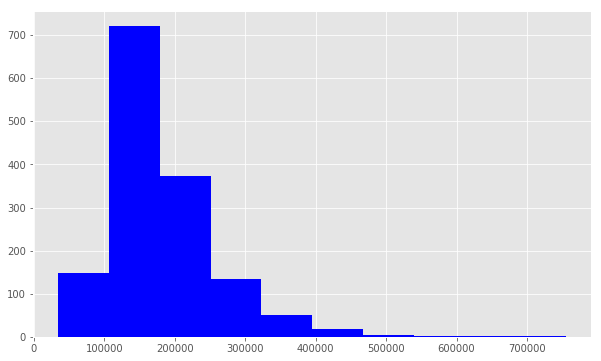

In [84]:
print ("Skewness is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

From a seaborn diagram to see the shape of the distribution of this histogram

Skewness is: 1.8902547272110803
Kurtosis is: 6.600459765569916


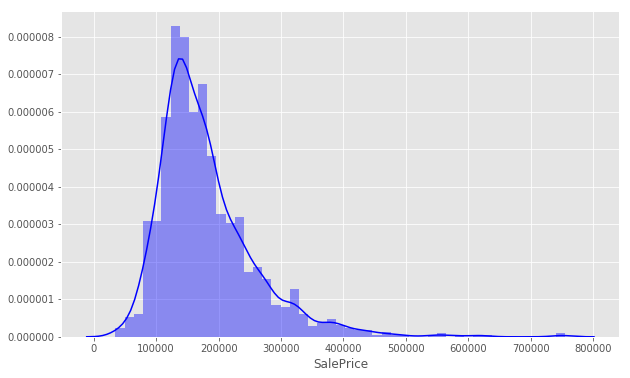

In [97]:
print("Skewness is:", train.SalePrice.skew())
print("Kurtosis is:", train.SalePrice.kurt())

sns.distplot(train.SalePrice, color='blue')

In statistics, a data with both skewness and kurtosis close to zero means that the data is very close to being a normal distribution. Clearly, our data here is not normally distributed given the value of the skewness and kurtosis. The skewness shows where the longer tail of the distribution lies, hence a positive skewness means the longer tail goes towards the right.
The kurtosis shows how sharp the tip (relative to a standard bell curve) of the distribution is. The closer to zero it is, the normal our data looks. Hence we need to improve the normality or linearity of our data set.

### Improving the Distribution Shape and Linearity

As we will need to perform a regression analysis on this data set, which has turned out to be right skewed, we need to improve on its linearity, i.e to normalise the data. One way to do this is to log-transform the data. Although, the predictions will also be log-transformed at the end of this analysis, we will have to transform them, back to their original forms at the end.

Using the np.log() function to transform the train.SalePrice data and setting it as our **target variable** for prediction, after which we will now check for the skewness of this transformation using a histogram still;

Skew is: 0.12133506220520406


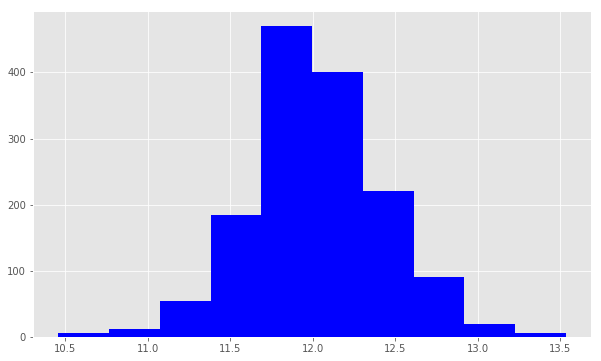

In [16]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

Skewness is: 0.12133506220520406
Kurtosis is: 0.8095319958036296


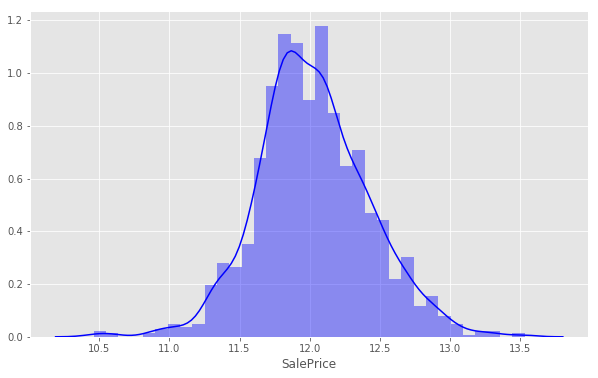

In [98]:
print("Skewness is:", target.skew())
print("Kurtosis is:", target.kurt())

sns.distplot(target, color='blue')

After the transformation, the values for the skewness and kurtosis for our data is very close to zero, hence our data is very close to being normally distributed. The line plot below compares the initial distribution shape of our data set with that of the transformed (normalised) data set. While the probability plot compares the linearity of our transformation to that of a perfectly linear data set.

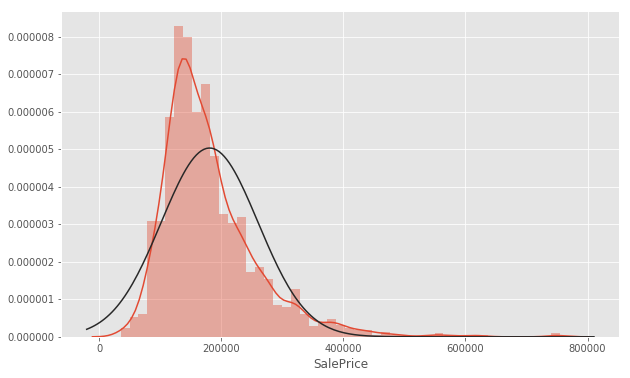

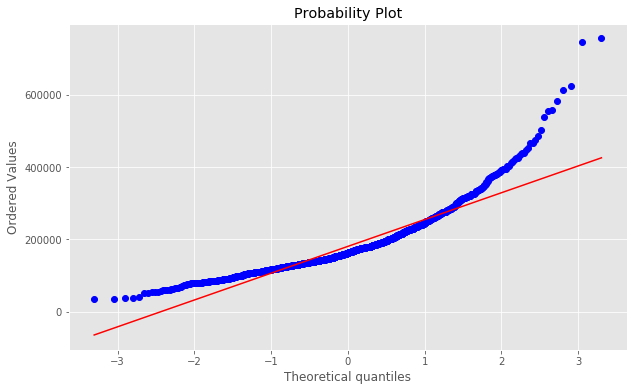

In [70]:
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

This transformation works and our distribution looks normal now.

### Working With Numeric Features

Considering some numeric features, taking a look at them and plotting them on charts for further exploration. The .select.dtypes() method returns a subset of columns matching the specified data types (where nf = numeric features).

In [17]:
nf = train.select_dtypes(include=[np.number])
nf.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

Taking a look at the how some these columns correlate with the SalePrice column

In [99]:
corr = nf.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:10], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-10:])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64 

BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The first ten features here are the most positively correlated with the SalePrice column while the last ten are the most negatively correlated with SalePrice. 

This means; 
for all positive correlations, an increase in the values each of the positively correlated variables, will result in an increase in the value of the 'SalePrice'. Similarly, a decrease in their values will very likely result in a decrease in the value of their 'SalePrice'. 
while for all negatively correlated variables, an increase in SalePrice could result have a negative effect on them.

### Treating Categorical Variables

Checking out OverallQual using the .unique() method to get the unique values. These are usually values between 1 t0 10;

In [22]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

Checking out the relationship between the OverallQual and SalePrice and putting this in a pivot table

In [23]:
qpivot = train.pivot_table(index='OverallQual', values='SalePrice', aggfunc=np.median)
qpivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


Putting this table into visualisation

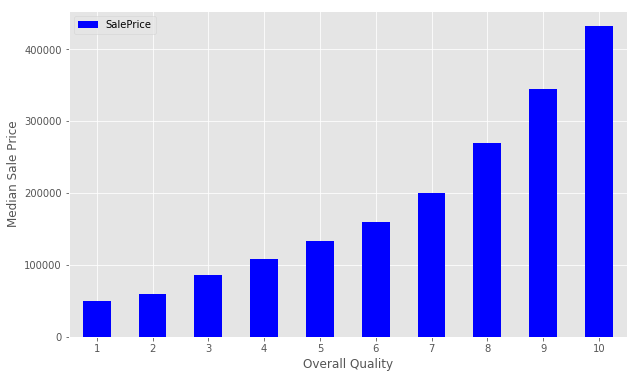

(-0.5, 9.5, 0, 1000000)

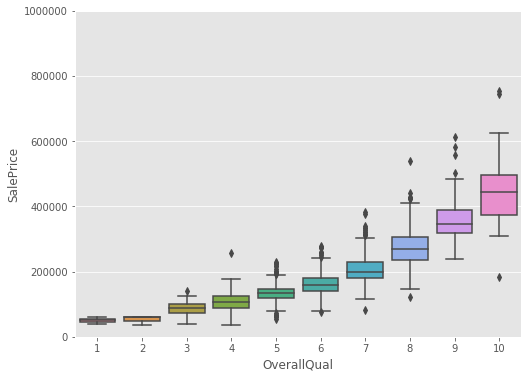

In [79]:
qpivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

# boxplot of the relationship between SalePrice and Overall Quality
data = pd.concat([train.SalePrice, train.OverallQual], axis=1)
f, ax= plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='OverallQual', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=1000000)

This visualisation shows an increase in the Median Sales Price with a corresponding increase in the Overall Quality of the houses.

Comparing SalePrice with the year the houses were built (that is "YearBuilt)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

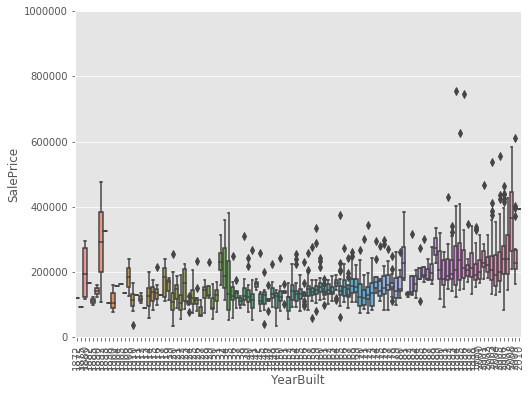

In [80]:
# boxplot of the relationship between SalePrice and YearBuilt
data = pd.concat([train.SalePrice, train.YearBuilt], axis=1)
f, ax= plt.subplots(figsize=(8,6))
fig=sns.boxplot(x='YearBuilt', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)

From the visualisation, although it is not a very strong tendency, the more recent the property was developed, the higher the SalePrice is likely to be, with very few exceptions. The exceptions may be due to the fact that the houses involved may hold historic or sentimental values.

Next to see, how the Ground Living Area (GrLivArea) relates with the SalePrice, we put the two variables in a scatter plot and visualise their relationship.

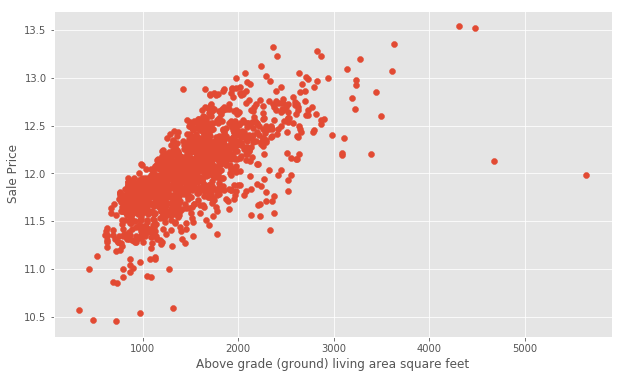

In [27]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

We also see here that the Ground Living Area also increases with increasing Sales Price

Relating the Garage Area and the Sales price also in a scatter plot

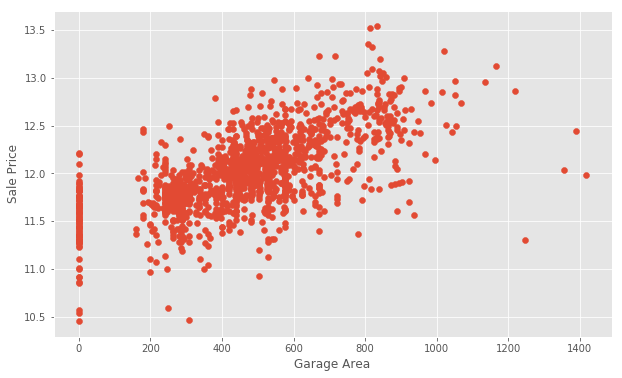

In [28]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

For this visualisation, the presence of outliers can be observed from around Garage Area>1200. These values do not have any significant meaning that relates with the rest of the data set so we can trim them out of the data set. For example, it is illogical for a house with a Garage Area of about 800squarefeet to have a SalePrice Value of about 13.5 while a house with 1200squarefeet will have a value of just around 11.

It can also be observed that there are houses with no garages at all.

to trim the garage data and remove the outliers

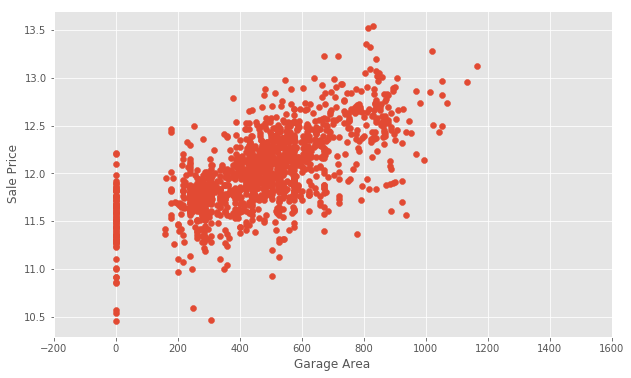

In [29]:
train = train[train['GarageArea'] < 1200]
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Comparing 'SalePrice' to 'TotalBsmtSF'

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

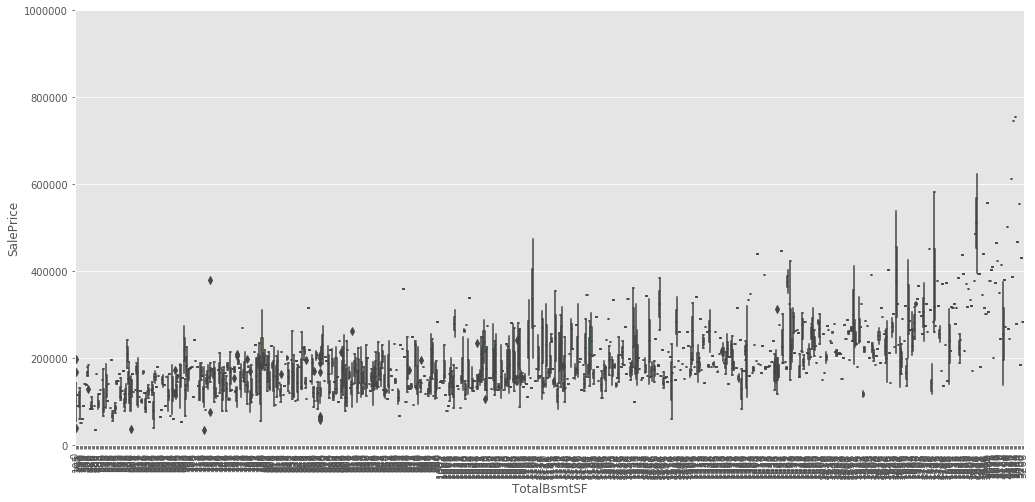

In [110]:
# boxplot of the relationship between SalePrice and YearBuilt
bd = pd.concat([train.SalePrice, train.TotalBsmtSF], axis=1)
f, ax= plt.subplots(figsize=(17,8))
fig=sns.boxplot(x='TotalBsmtSF', y='SalePrice', data=bd)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)


Sales Price also has a positive relationship with the Total square feet of basement area (TotalBsmtSF) as either increases with increasing value of the other, although with very little tendencies.

#### Comparing 'SalePrice' with some negatively correlated variable.

Comparing 'SalePrice' with Overall Condition ('OverallCond')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

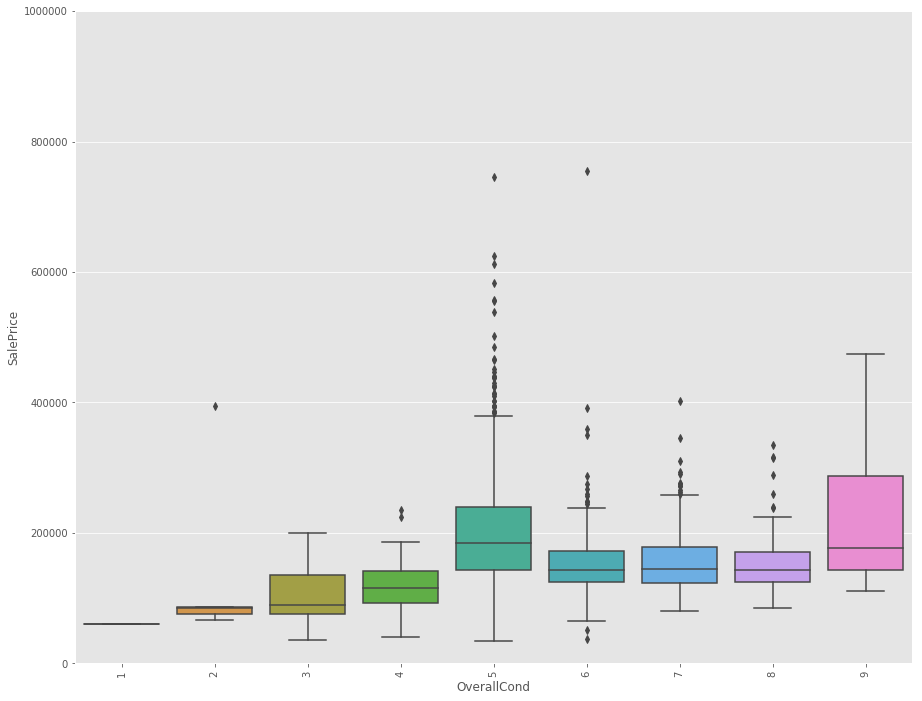

In [108]:
# boxplot of the relationship between SalePrice and Overall COndition
data = pd.concat([train.SalePrice, train.OverallCond], axis=1)
f, ax= plt.subplots(figsize=(15,12))
fig=sns.boxplot(x='OverallCond', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)

There appears to be an anomaly in the relationship between the OverallCondition and SalePrice. The data here shows that houses with average overall (5) conditions are more expensive than those with excellent conditions ( between 9 and 10). This is only possible if such a house holds some historical or sentimental values, then they can be aunctioned at very high prices.

Comparing 'SalePrice' with 'YearSold'

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

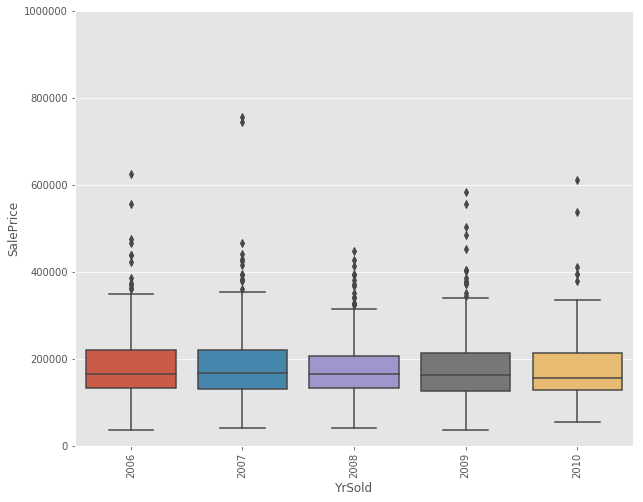

In [107]:
# boxplot of the relationship between SalePrice and Year Sold
data = pd.concat([train.SalePrice, train.YrSold], axis=1)
f, ax= plt.subplots(figsize=(10,8))
fig=sns.boxplot(x='YrSold', y='SalePrice', data=data)
fig.axis(ymin=0, ymax=1000000)
plt.xticks(rotation=90)

The year a house was sold does not really affect its SalePrice.

### Handling Null Values

In [112]:
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageQual,81
GarageCond,81
GarageType,81


Dealing with Misceallenous Features

In [114]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


These values describe whether or not the house has a shed over 100 sqft, a second garage, and so on. We might want to use this information later. It’s important to gather domain knowledge in order to make the best decisions when dealing with missing data.

### Dealing with the Categorical data

In [115]:
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


### Transforming and Engineering Features

When transforming features, it’s important to remember that any transformations that you’ve applied to the training data before fitting the model must be applied to the test data.

Our model expects that the shape of the features from the train set match those from the test set. This means that any feature engineering that occurred while working on the train data should be applied again on the test set.

To demonstrate how this works, consider the Street data, which indicates whether there is Gravel or Paved road access to the property.

In [116]:
print ("Original: \n")
print (train.Street.value_counts(), "\n")

Original: 

Pave    1450
Grvl       5
Name: Street, dtype: int64 



In the Street column, the unique values are Pave and Grvl, which describe the type of road access to the property. In the training set, only 5 homes have gravel access. Our model needs numerical data, so we will use one-hot encoding to transform the data into a Boolean column.

We create a new column called enc_street. The pd.get_dummies() method will handle this for us.

As mentioned earlier, we need to do this on both the train and test data.

In [117]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [118]:
print ('Encoded: \n')
print (train.enc_street.value_counts())

Encoded: 

1    1450
0       5
Name: enc_street, dtype: int64


The values agree. We’ve engineered our first feature! Feature Engineering is the process of making features of the data suitable for use in machine learning and modelling. When we encoded the Street feature into a column of Boolean values, we engineered a feature.

Let’s try engineering another feature. We’ll look at SaleCondition by constructing and plotting a pivot table, as we did above for OverallQual.

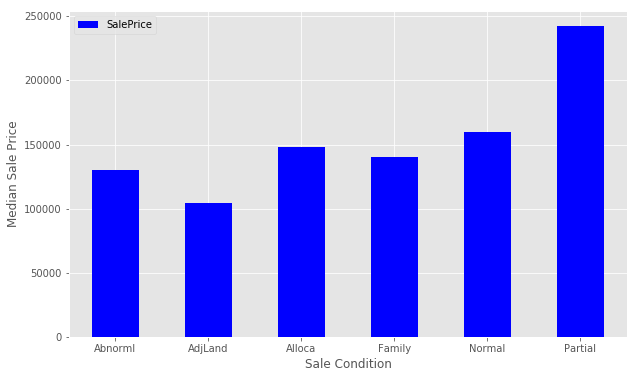

In [119]:
cond_pivot = train.pivot_table(index='SaleCondition', values='SalePrice', aggfunc=np.median)
cond_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that Partial has a significantly higher Median Sale Price than the others. We will encode this as a new feature. We select all of the houses where SaleCondition is equal to Patrial and assign the value 1, otherwise assign 0.

Follow a similar method that we used for Street above.

In [120]:
def encode(x):
 return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

Let’s explore this new feature as a plot.

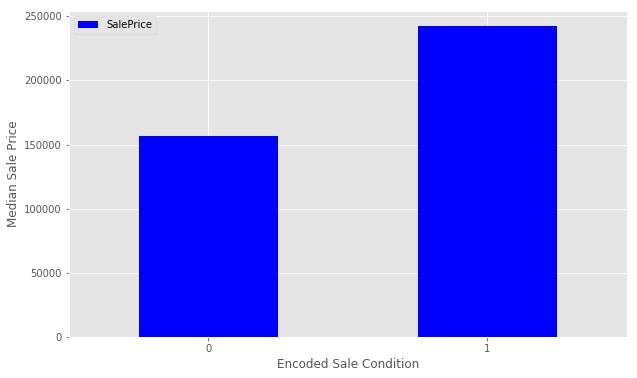

In [121]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

This looks great. You can continue to work with more features to improve the ultimate performance of your model.

Before we prepare the data for modeling, we need to deal with the missing data. We’ll fill the missing values with an average value and then assign the results to data. This is a method of interpolation. The DataFrame.interpolate() method makes this simple.

This is a quick and simple method of dealing with missing values, and might not lead to the best performance of the model on new data. Handling missing values is an important part of the modeling process

In [51]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

Check if the all of the columns have 0 null values.

In [52]:
sum(data.isnull().sum() != 0)

0

# Build A Linear Model

Let’s perform the final steps to prepare our data for modeling. We’ll separate the features and the target variable for modeling. We will assign the features to X and the target variable to y. We use np.log() as explained above to transform the y variable for the model. data.drop([features], axis=1) tells pandas which columns we want to exclude. We won’t include SalePrice for obvious reasons, and Id is just an index with no relationship to SalePrice.

In [123]:
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

KeyError: "['Id'] not found in axis"

Let’s partition the data and start modeling.
We will use the train_test_split() function from scikit-learn to create a training set and a hold-out set. Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

train_test_split() returns four objects:

1. X_train is the subset of our features used for training.
2. X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
3. y_train is the target variable SalePrice which corresponds to X_train.
4. y_test is the target variable SalePrice which corresponds to X_test.
The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set random_state=42. This provides for reproducible results, since sci-kit learn’s train_test_split will randomly partition the data. The test_size parameter tells the function what proportion of the data should be in the test partition. In this example, about 33% of the data is devoted to the hold-out set.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33)

### Begin modelling

We will first create a Linear Regression model. First, we instantiate the model.

In [55]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

Next, we need to fit the model. First instantiate the model and next fit the model. Model fitting is a procedure that varies for different types of models. Put simply, we are estimating the relationship between our predictors and the target variable so we can make accurate predictions on new data.

We fit the model using X_train and y_train, and we’ll score with X_test and y_test. The lr.fit() method will fit the linear regression on the features and target variable that we pass.

In [56]:
model = lr.fit(X_train, y_train)

### Evaluate the performance and visualize results

Now, we want to evaluate the performance of the model.
Each competition might evaluate the submissions differently. In this competition, Kaggle will evaluate our submission using root-mean-squared-error (RMSE). We’ll also look at The r-squared value. The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

The model.score() method returns the r-squared value by default.

In [57]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.888247770926258


This means that our features explain approximately 89% of the variance in our target variable.

Next, we’ll consider rmse. To do so, use the model we have built to make predictions on the test data set.

In [58]:
predictions = model.predict(X_test)

The model.predict() method will return a list of predictions given a set of predictors. Use model.predict() after fitting the model.

The mean_squared_error function takes two arrays and calculates the rmse.

In [59]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.017841794519567168


Interpreting this value is somewhat more intuitive that the r-squared value. The RMSE measures the distance between our predicted values and actual values.

We can view this relationship graphically with a scatter plot.

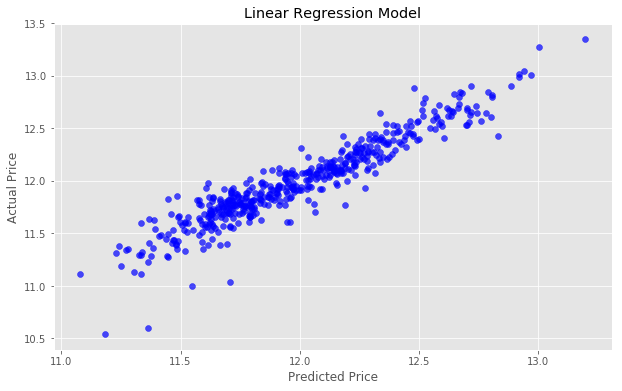

In [60]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

If our predicted values were identical to the actual values, this graph would be the straight line y=x because each predicted value x would be equal to each actual value y.

### Try to improve the model

We’ll next try using Ridge Regularization to decrease the influence of less important features. Ridge Regularization is a process which shrinks the regression coefficients of less important features.

We’ll once again instantiate the model. The Ridge Regularization model takes a parameter, alpha , which controls the strength of the regularization.

We’ll experiment by looping through a few different values of alpha, and see how this changes our results.

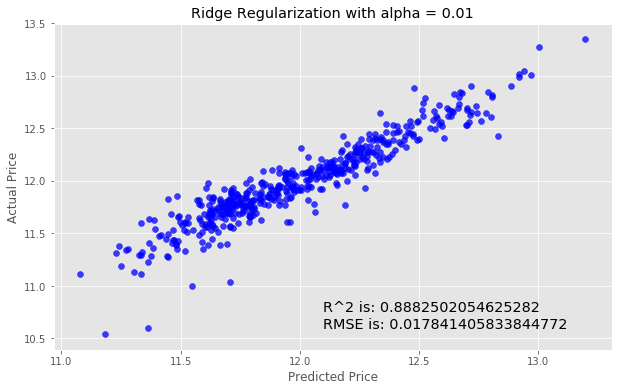

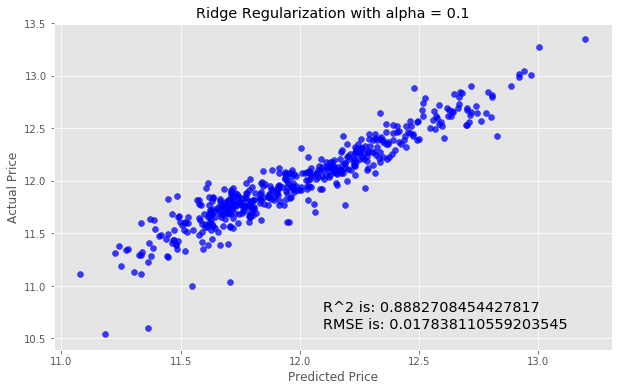

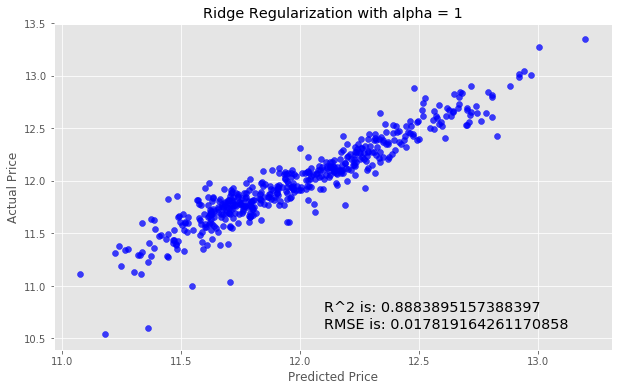

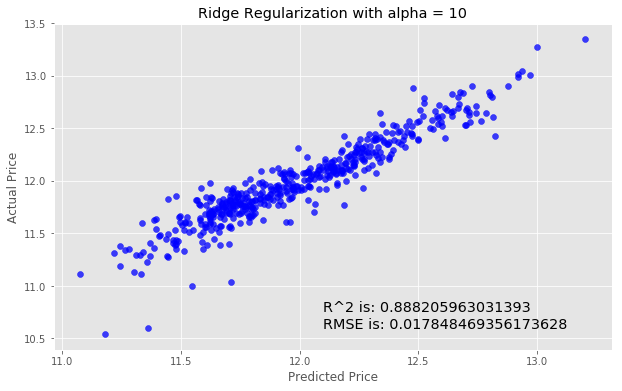

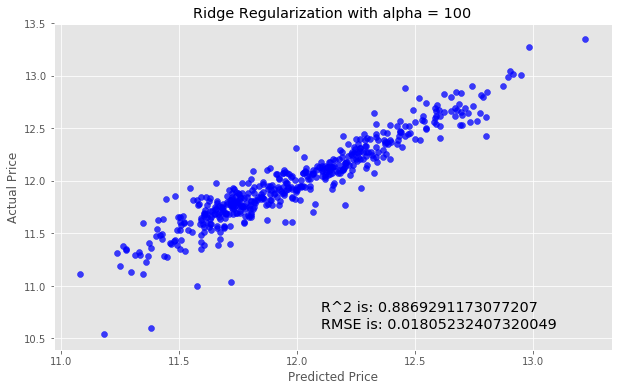

In [61]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)

    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

### Step 4: Make a submission

We’ll need to create a csv that contains the predicted SalePrice for each observation in the test.csv dataset.

In [62]:
submission = pd.DataFrame()
submission['Id'] = test.Id

Now, select the features from the test data for the model as we did above.

In [63]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

Next, we generate our predictions.

In [64]:
predictions = model.predict(feats)

Now we’ll transform the predictions to the correct form. Remember that to reverse log() we do exp().
So we will apply np.exp() to our predictions becasuse we have taken the logarithm previously.

In [65]:
final_predictions = np.exp(predictions)

Look at the predictions

In [129]:
print ("The first ten values of the Final Prediction are: \n", final_predictions[:10])

The first ten values of the Final Prediction are: 
 [128959.49172586 122920.74024357 175704.82598102 200050.83263755
 182075.46986405 172318.33397533 191064.621642   165488.5590167
 193158.99133192 116214.02546462]


Assigning these predictions

In [126]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,128959.491726
1,1462,122920.740244
2,1463,175704.825981
3,1464,200050.832638
4,1465,182075.469864


Exporting to a word document file

In [133]:
submission.to_csv('Kenn submission.docx', index=False)